# <h1 align= 'center'><font size="10">**Generative Adversarial Networks (GANs)**<font><h1>

## Step 1. Import libraries

In [6]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for assembling a Neural Network model
from keras.layers import Dense # adding layers to the Neural Network model
from tensorflow.keras.utils import plot_model # for plotting model diagram


# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import math # for generating real data (points on a circle in this case)

# Visualization
import matplotlib
import matplotlib.pyplot as plt # or data visualizationa
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version
import plotly
import plotly.express as px # for data visualization
print('plotly: %s' % plotly.__version__) # print version


# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])

numpy: 1.25.2
pandas: 1.5.3
matplotlib: 3.7.1
graphviz: 0.20.3
plotly: 5.15.0


## Step 2. Preparing data
We're going to create a circle and note down the positions of points around its edge. Then, we'll use a GAN (a type of AI) to learn how this circle looks. The GAN has two parts: one part tries to make circles based on what it learns (generator), and the other part judges if the circles look right (discriminator). We'll teach them until the first part gets really good at drawing circles just like the one we made.

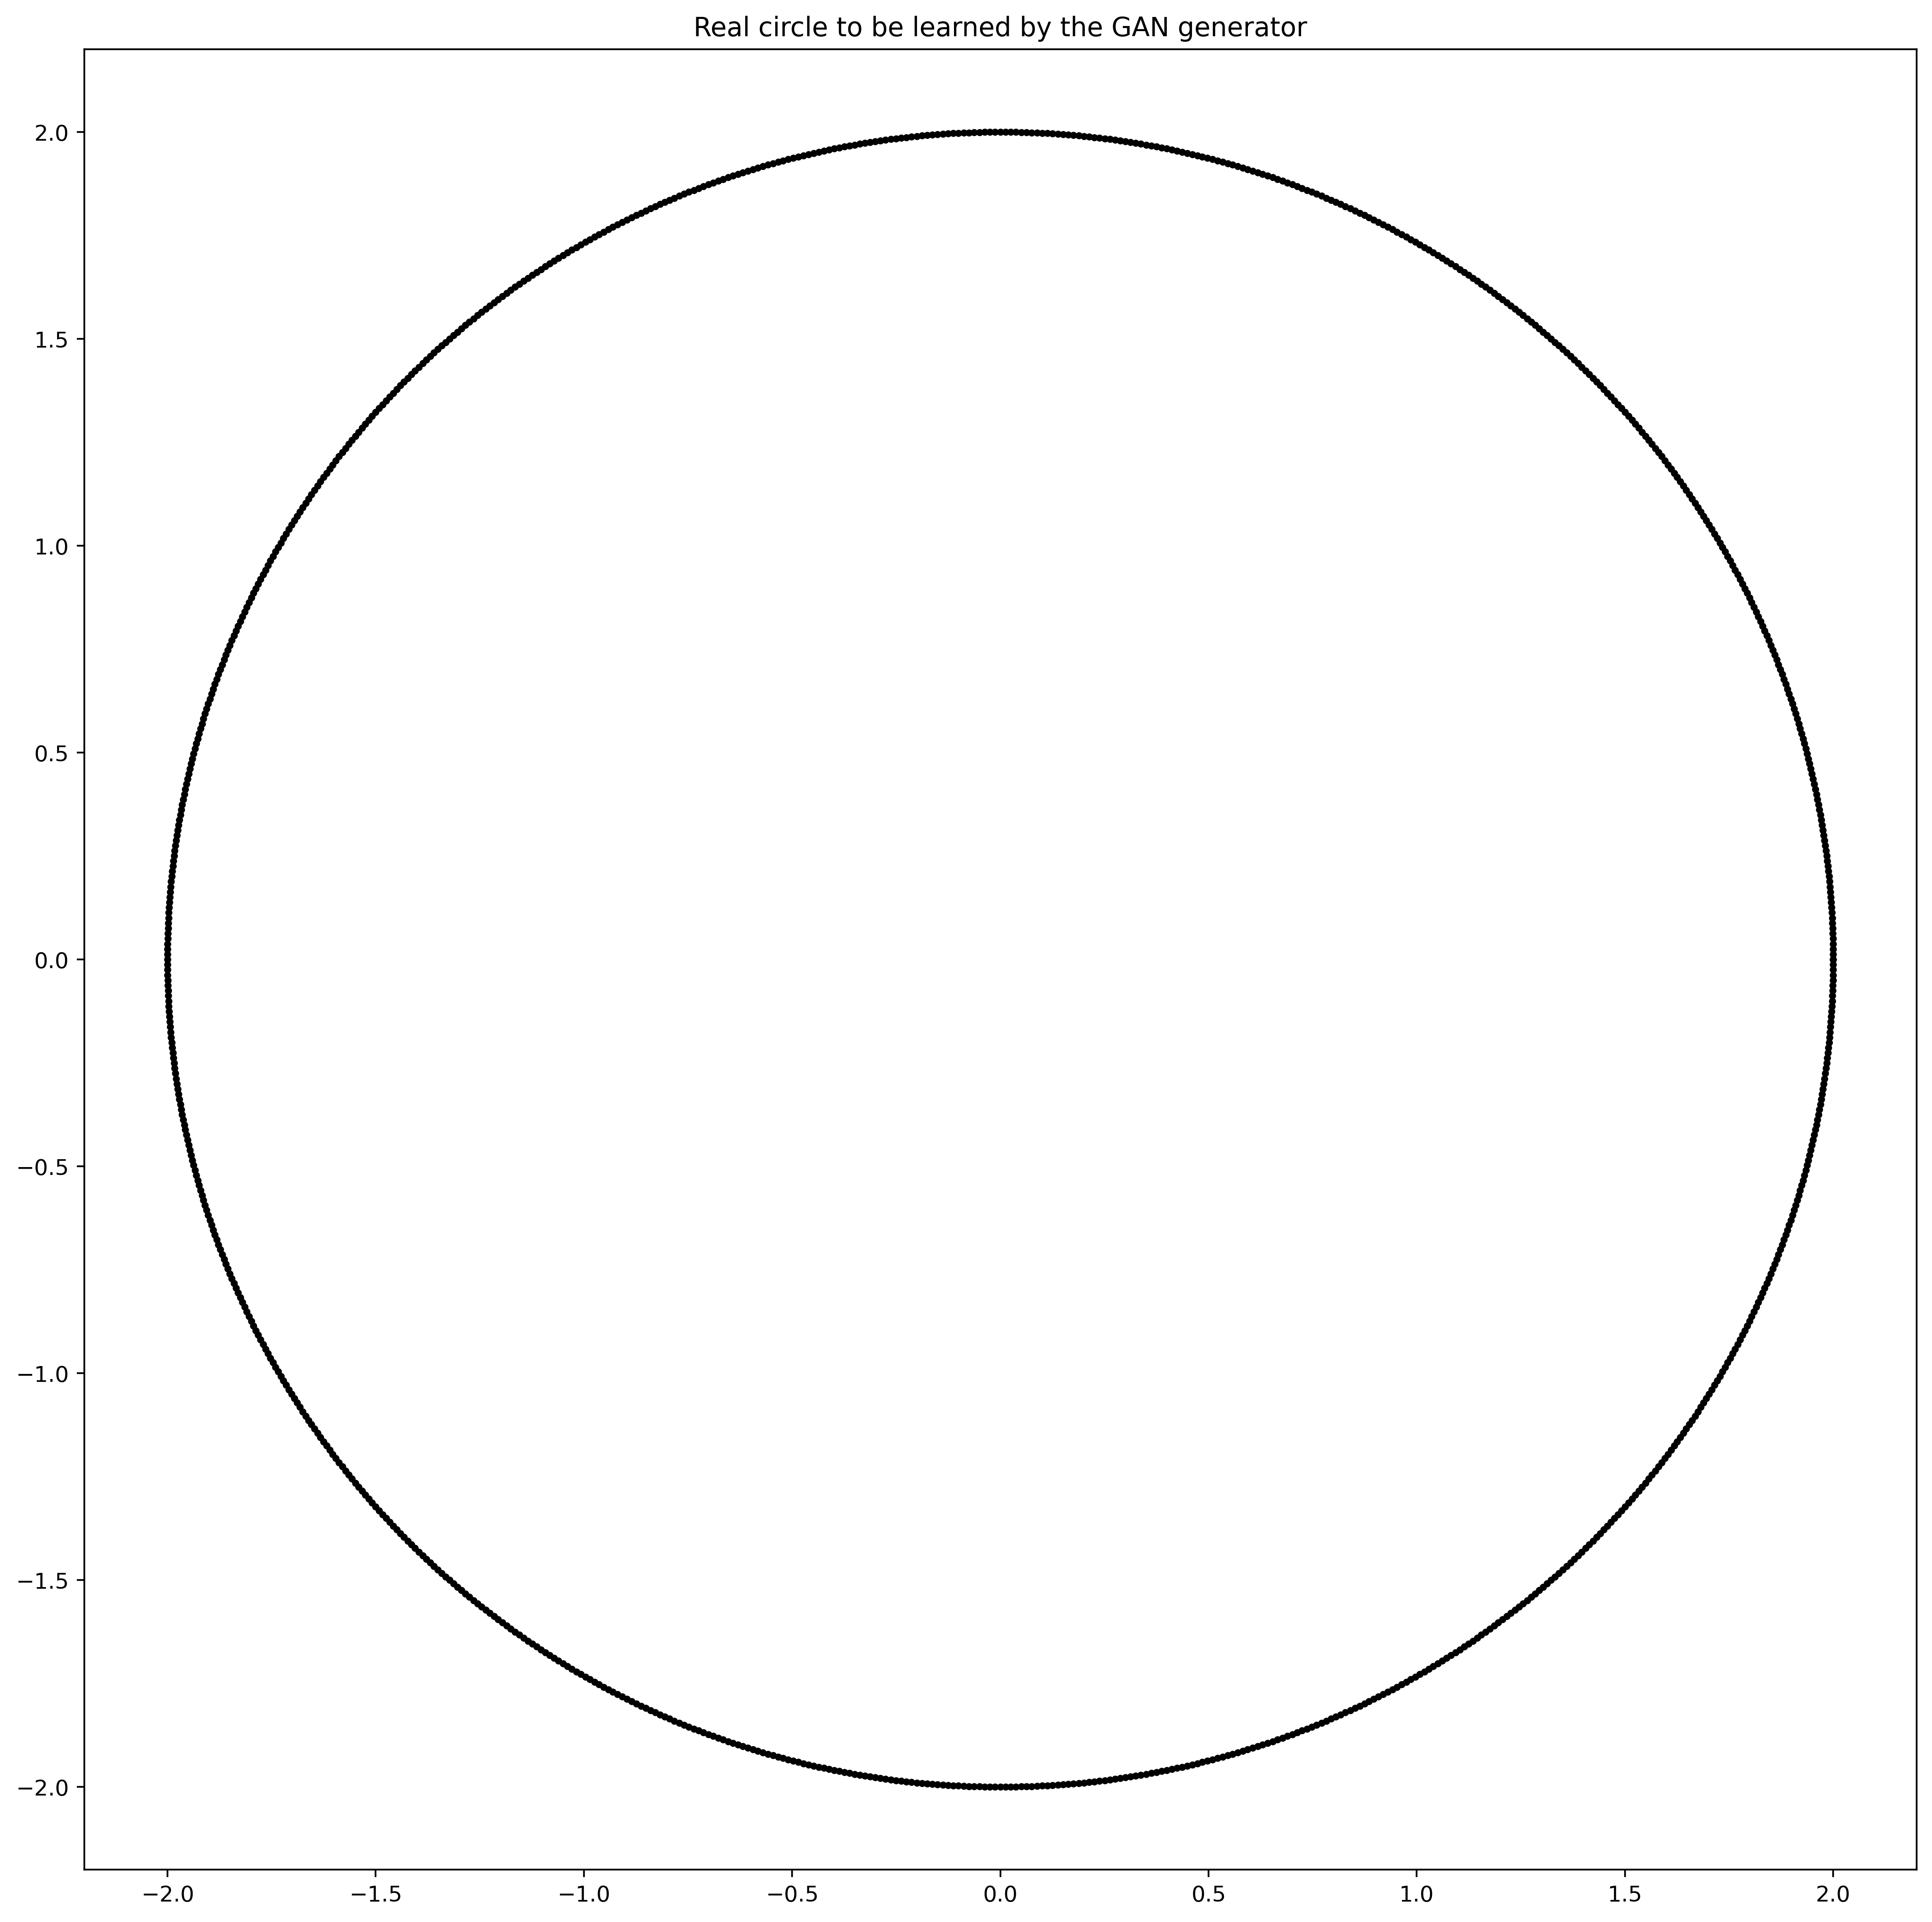

In [7]:
# A function to get coordinates of points on circle's circumference
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r,math.sin(2*math.pi/n*x)*r) for x in range(0,n+1)]

# Save coordinates of a set of real points making up a circle with radius=2
circle=np.array(PointsInCircum(r=2,n=1000))

# Draw a chart
plt.figure(figsize=(15,15), dpi=400)
plt.title(label='Real circle to be learned by the GAN generator', loc='center')
plt.scatter(circle[:,0], circle[:,1], s=5, color='black')
plt.show()

### Now that the data is ready let's create a GAN model
## Step 3. Setup of GAN Model
## Step 3a. first Generator

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Generator-Hidden-Layer-1 (  (None, 32)                128       
 Dense)                                                          
                                                                 
 Generator-Hidden-Layer-2 (  (None, 16)                528       
 Dense)                                                          
                                                                 
 Generator-Output-Layer (De  (None, 2)                 34        
 nse)                                                            
                                                                 
Total params: 690 (2.70 KB)
Trainable params: 690 (2.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


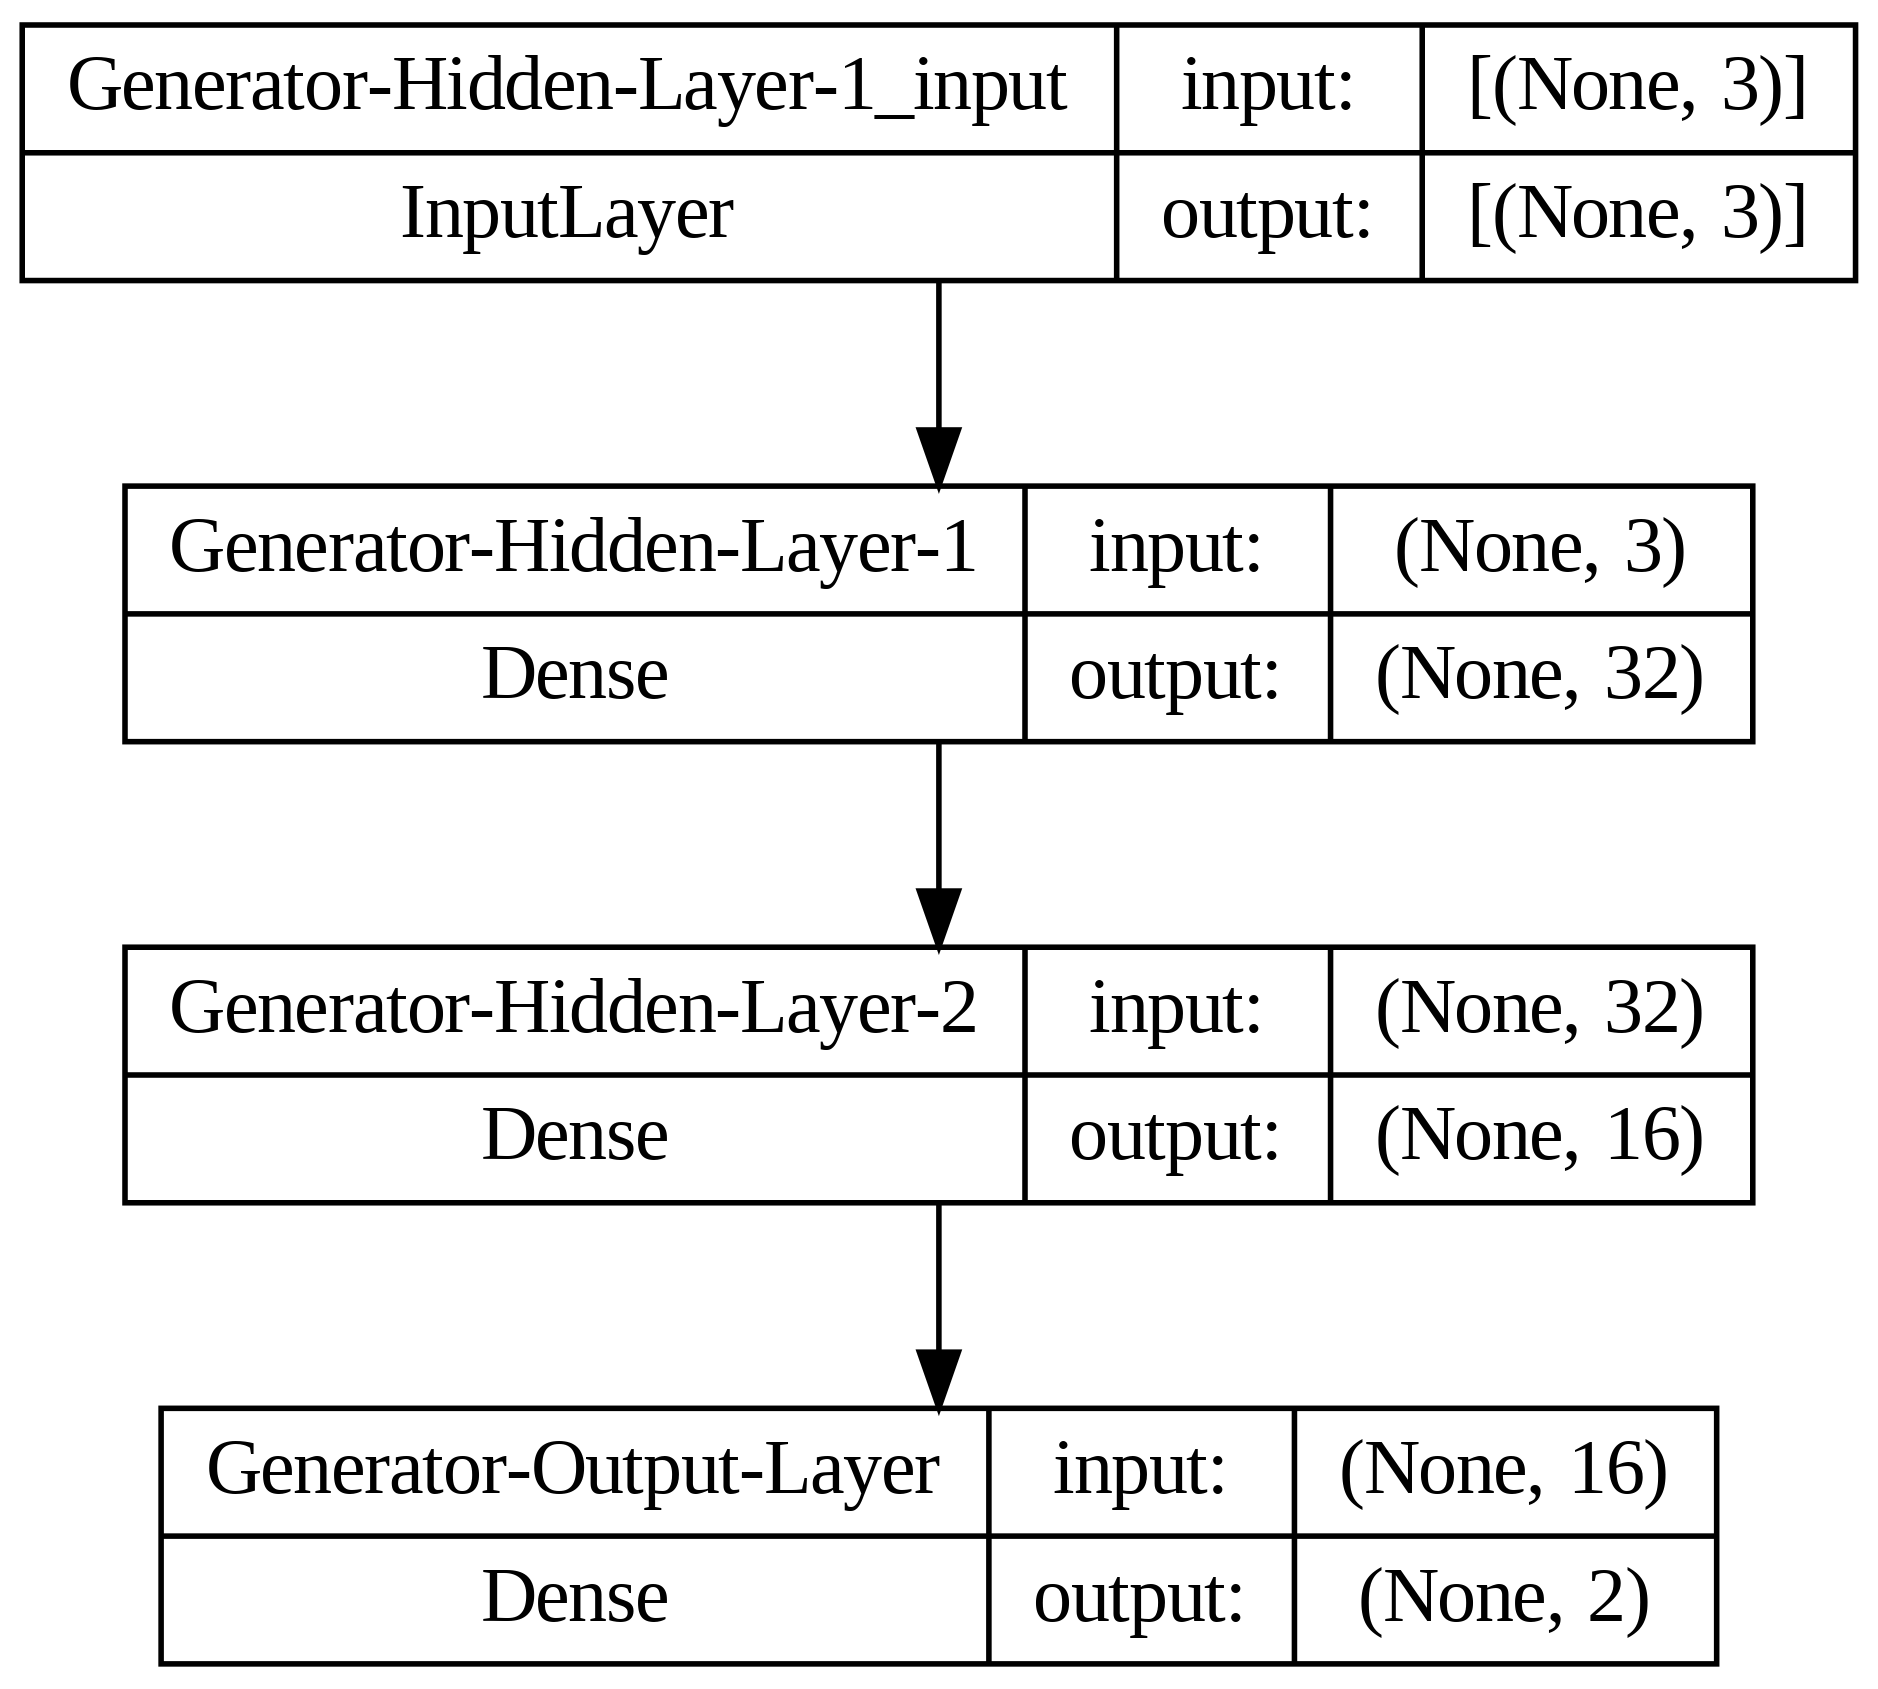

In [8]:
# Define Generator model
def generator(latent_dim, n_outputs=2):
    model = Sequential(name="Generator") # Model

    # Add Layers
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim, name='Generator-Hidden-Layer-1')) # Hidden Layer
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform', name='Generator-Hidden-Layer-2')) # Hidden Layer
    model.add(Dense(n_outputs, activation='linear', name='Generator-Output-Layer')) # Output Layer
    return model

# Instantiate
latent_dim=3
gen_model = generator(latent_dim)

# Show model summary and plot model diagram
gen_model.summary()
plot_model(gen_model, show_shapes=True, show_layer_names=True, dpi=400)

### Our generator starts with three input nodes because we're using a random vector from a latent space with three dimensions. It's up to us how many dimensions this starting space has. For the output, it gives us two numbers. These numbers are the x and y positions of a point on a flat, 2D surface.

## Step 3b. Now discriminator

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Discriminator-Hidden-Layer  (None, 32)                96        
 -1 (Dense)                                                      
                                                                 
 Discriminator-Hidden-Layer  (None, 16)                528       
 -2 (Dense)                                                      
                                                                 
 Discriminator-Output-Layer  (None, 1)                 17        
  (Dense)                                                        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


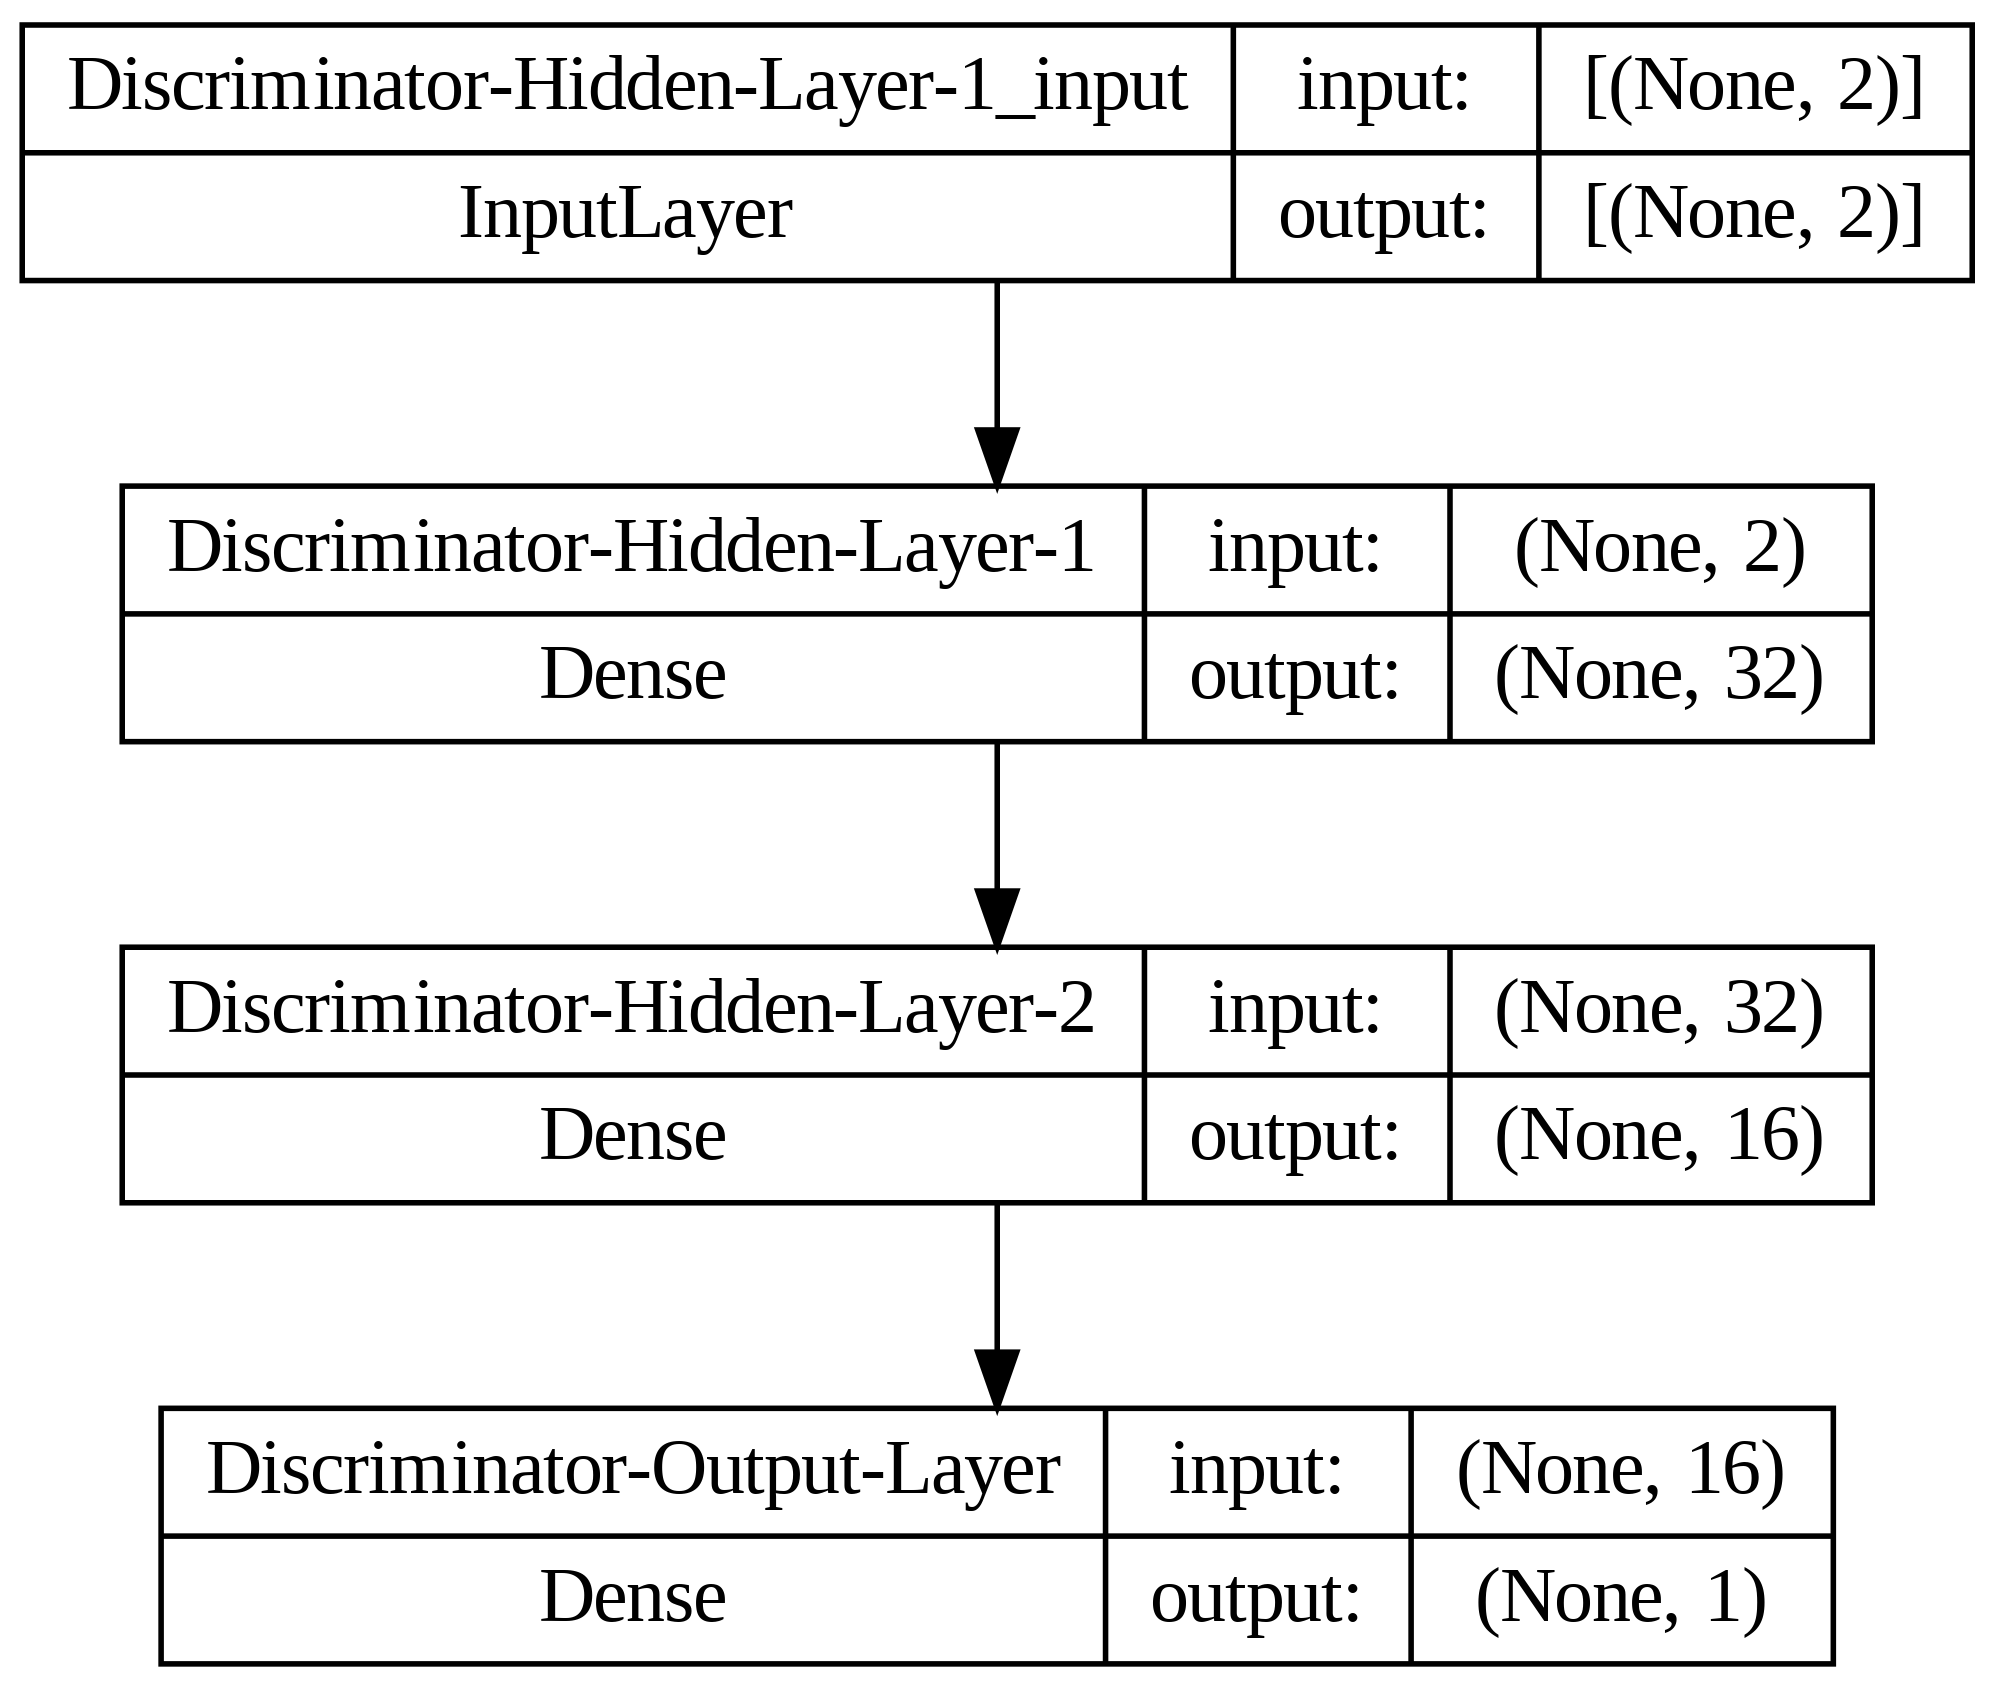

In [9]:
# Define a Discriminator model
def discriminator(n_inputs=2):
    model = Sequential(name="Discriminator") # Model

    # Add Layers
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs, name='Discriminator-Hidden-Layer-1')) # Hidden Layer
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform', name='Discriminator-Hidden-Layer-2')) # Hidden Layer
    model.add(Dense(1, activation='sigmoid', name='Discriminator-Output-Layer')) # Output Layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate
dis_model = discriminator()

# Show model summary and plot model diagram
dis_model.summary()
plot_model(dis_model, show_shapes=True, show_layer_names=True, dpi=400)

### The discriminator takes in two values, which match the output of the generator. These values represent the x and y positions of a point on a flat, 2D surface. On the other hand, the discriminator's output is a single value that indicates the model's confidence in determining whether the data is real or fake.

### Now we combine the two 3a and 3b to create GAN. Here, you should notice that we use the non trainable discriminator. Why we are do this? To train the discriminator seperately using the combination of real and fake data. Let's see how we are going to perform that:  

Model: "GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Generator (Sequential)      (None, 2)                 690       
                                                                 
 Discriminator (Sequential)  (None, 1)                 641       
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 690 (2.70 KB)
Non-trainable params: 641 (2.50 KB)
_________________________________________________________________


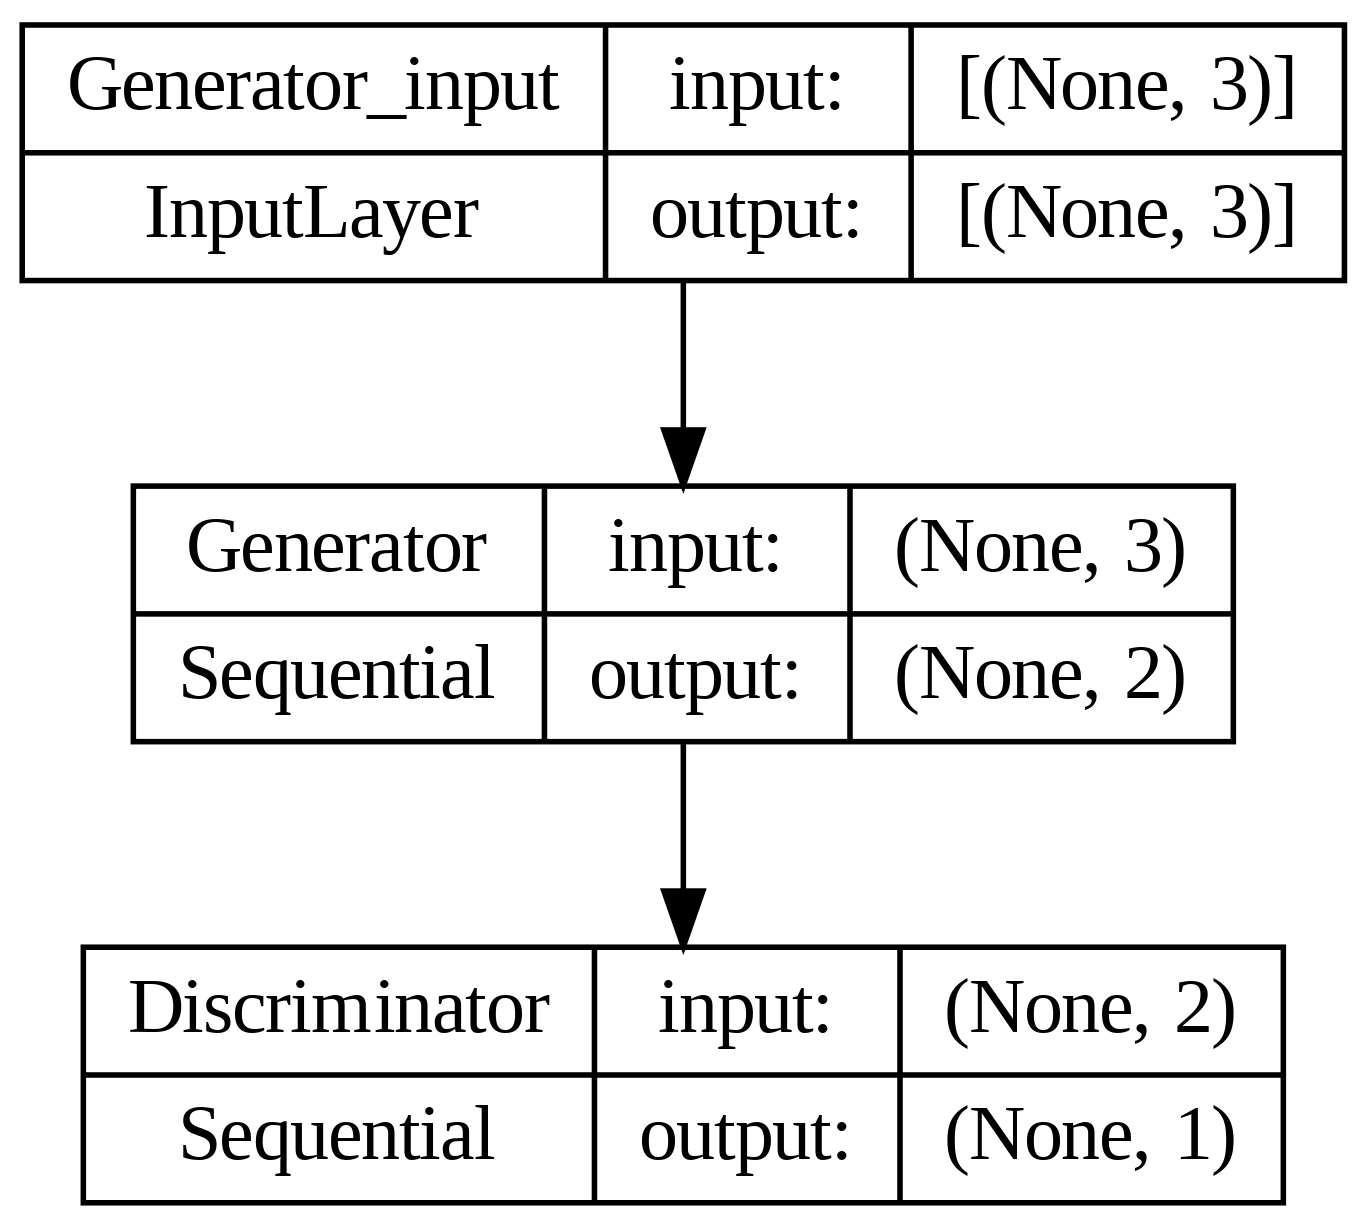

In [19]:
def def_gan(generator, discriminator):

    # We don't want to train the weights of discriminator at this stage. Hence, make it not trainable
    discriminator.trainable = False

    # Combine
    model = Sequential(name="GAN") # GAN Model
    model.add(generator) # Add Generator
    model.add(discriminator) # Add Disriminator

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Instantiate
gan_model = def_gan(gen_model, dis_model)

# Show model summary and plot model diagram
gan_model.summary()
plot_model(gan_model, show_shapes=True, show_layer_names=True, dpi=400)

## Step 5. Prepare the inputs for the generator and discriminator
### Let's create three simple functions that will help us in sampling and generating the data.
### Step 5a. First function draws the sample random points from the circle.
### Step 5b. Second function draws the random vectors from the latent space
### Step 5c. Third function passes the latent variable into generator model to generate fake examples.


In [11]:
# 5a. Set up a function to sample random points form our circle
def real_samples(n):

    # Samples of real data
    X = circle[np.random.choice(circle.shape[0], n, replace=True), :]

    # Class labels
    y = np.ones((n, 1))
    return X, y


# 5b. Generate points in the latent space, which we will use as inputs for the generator
def latent_points(latent_dim, n):

    # Generate points in the latent space
    latent_input = np.random.randn(latent_dim * n)

    # Reshape into a batch of inputs for the network
    latent_input = latent_input.reshape(n, latent_dim)
    return latent_input


# 5c. Use the generator to generate n fake examples together with class labels
def fake_samples(generator, latent_dim, n):

    # Generate points in latent space
    latent_output = latent_points(latent_dim, n)

    # Predict outputs (i.e., generate fake samples)
    X = generator.predict(latent_output)

    # Create class labels
    y = np.zeros((n, 1))
    return X, y

## Step 6. Let's setup a function for model performance evaluation and training
### Show Discriminator model accuracy and plot real vs. fake (generated) comparison

In [12]:
def performance_summary(epoch, generator, discriminator, latent_dim, n=100):

    # Get samples of the real data
    x_real, y_real = real_samples(n)
    # Evaluate the descriminator on real data
    _, real_accuracy = discriminator.evaluate(x_real, y_real, verbose=1)

    # Get fake (generated) samples
    x_fake, y_fake = fake_samples(generator, latent_dim, n)
    # Evaluate the descriminator on fake (generated) data
    _, fake_accuracy = discriminator.evaluate(x_fake, y_fake, verbose=1)

    # summarize discriminator performance
    print("Epoch number: ", epoch)
    print("Discriminator Accuracy on REAL points: ", real_accuracy)
    print("Discriminator Accuracy on FAKE (generated) points: ", fake_accuracy)

    # Create a 2D scatter plot to show real and fake (generated) data points
    plt.figure(figsize=(4,4), dpi=150)
    plt.scatter(x_real[:, 0], x_real[:, 1], s=5, color='black')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], s=5, color='red')
    plt.show()

### Define a function to train our GAN model (generator and discriminator). We train the discriminator separately by passing a batch with 50% real and 50% fake (generated) samples. Meanwhile, the generator training happens via a combined GAN model.

In [13]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10001, n_batch=256, n_eval=1000):

    # Our batch to train the discriminator will consist of half real points and half fake (generated) points
    half_batch = int(n_batch / 2)

    # We will manually enumare epochs
    for i in range(n_epochs):

    # Discriminator training
        # Prep real samples
        x_real, y_real = real_samples(half_batch)
        # Prep fake (generated) samples
        x_fake, y_fake = fake_samples(g_model, latent_dim, half_batch)

        # Train the discriminator using real and fake samples
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)

    # Generator training
        # Get points from the latent space to be used as inputs for the generator
        x_gan = latent_points(latent_dim, n_batch)
        # While we are generating fake samples,
        # we want GAN generator model to create examples that resemble the real ones,
        # hence we want to pass labels corresponding to real samples, i.e. y=1, not 0.
        y_gan = np.ones((n_batch, 1))

        # Train the generator via a composite GAN model
        gan_model.train_on_batch(x_gan, y_gan)

        # Evaluate the model at every n_eval epochs
        if (i) % n_eval == 0:
            performance_summary(i, g_model, d_model, latent_dim)

## Step 7. Results
### Let's call the training function to show some results:

4/4 [==============================] - 0s 3ms/step - loss: 1.1422 - accuracy: 0.0000e+00
Epoch number:  0
Discriminator Accuracy on REAL points:  1.0
Discriminator Accuracy on FAKE (generated) points:  0.0


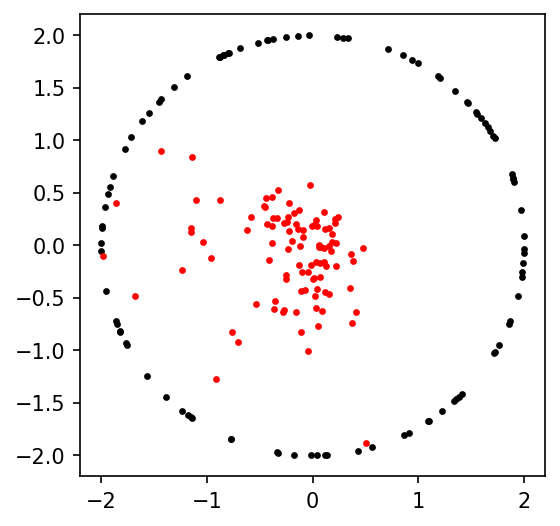

4/4 [==============================] - 0s 6ms/step - loss: 0.6451 - accuracy: 0.7600
Epoch number:  1000
Discriminator Accuracy on REAL points:  0.4699999988079071
Discriminator Accuracy on FAKE (generated) points:  0.7599999904632568


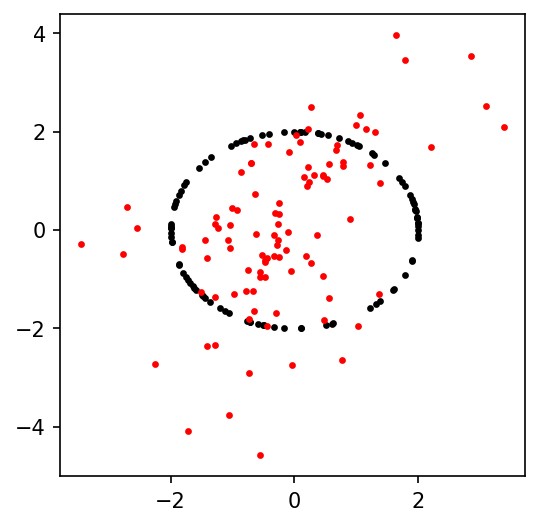

4/4 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.7200
Epoch number:  2000
Discriminator Accuracy on REAL points:  0.5899999737739563
Discriminator Accuracy on FAKE (generated) points:  0.7200000286102295


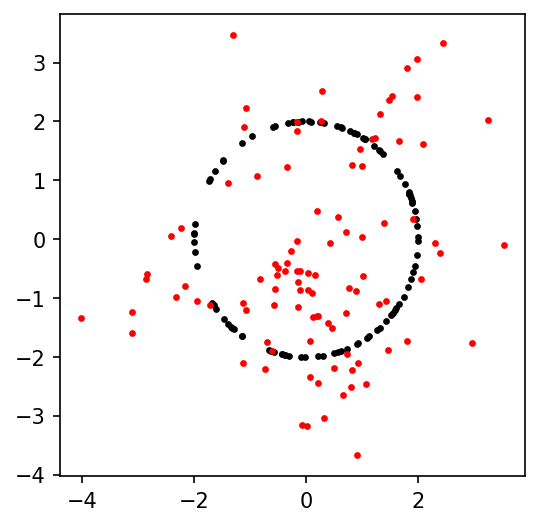

4/4 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.6300
Epoch number:  3000
Discriminator Accuracy on REAL points:  0.6000000238418579
Discriminator Accuracy on FAKE (generated) points:  0.6299999952316284


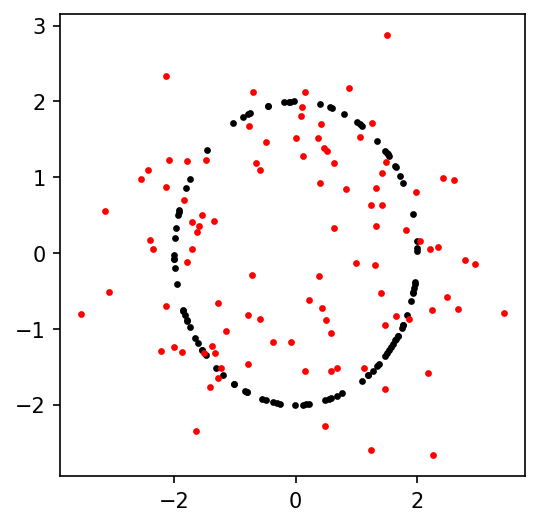

4/4 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5700
Epoch number:  4000
Discriminator Accuracy on REAL points:  0.5400000214576721
Discriminator Accuracy on FAKE (generated) points:  0.5699999928474426


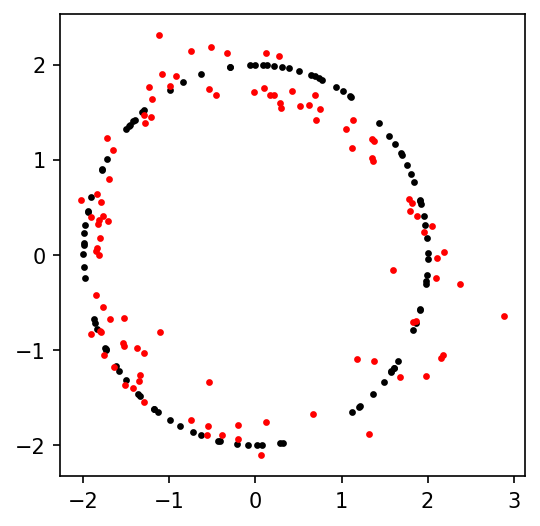

4/4 [==============================] - 0s 5ms/step - loss: 0.6798 - accuracy: 0.5700
Epoch number:  5000
Discriminator Accuracy on REAL points:  0.4000000059604645
Discriminator Accuracy on FAKE (generated) points:  0.5699999928474426


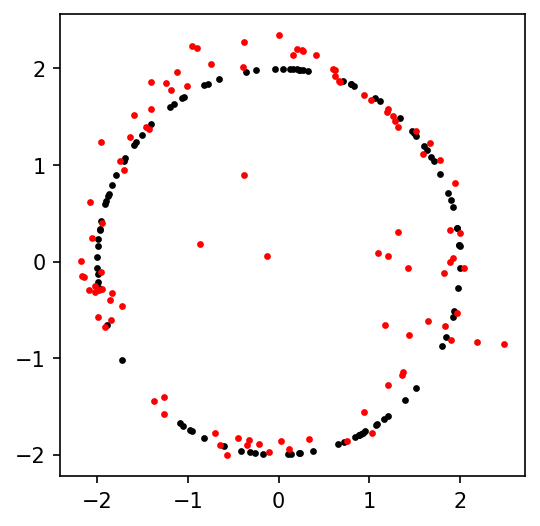

4/4 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5600
Epoch number:  6000
Discriminator Accuracy on REAL points:  0.6200000047683716
Discriminator Accuracy on FAKE (generated) points:  0.5600000023841858


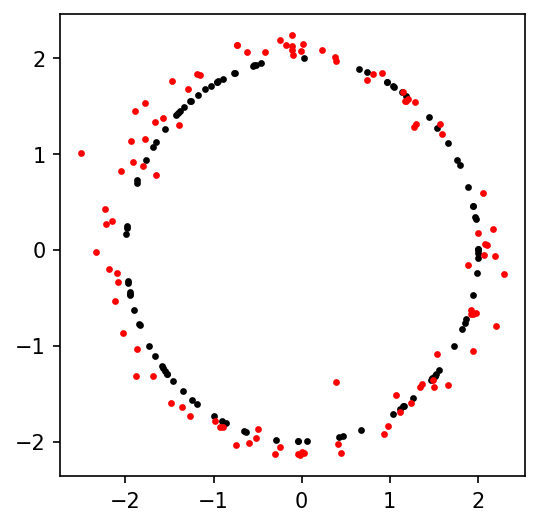

4/4 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.6800
Epoch number:  7000
Discriminator Accuracy on REAL points:  0.6100000143051147
Discriminator Accuracy on FAKE (generated) points:  0.6800000071525574


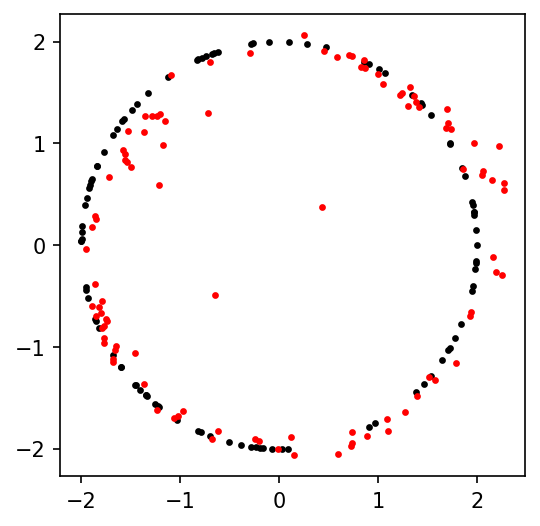

4/4 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.6100
Epoch number:  8000
Discriminator Accuracy on REAL points:  0.5099999904632568
Discriminator Accuracy on FAKE (generated) points:  0.6100000143051147


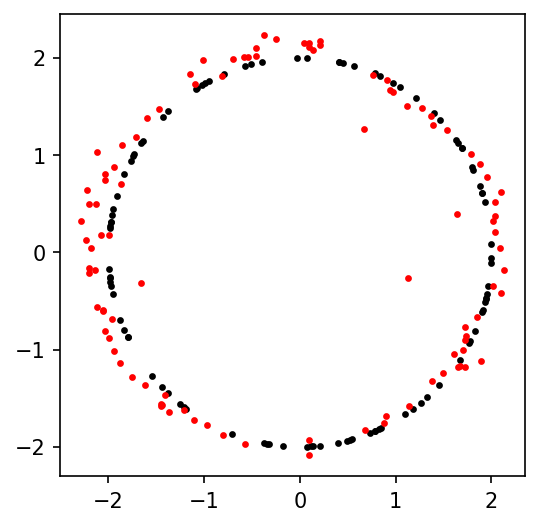

4/4 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.6900
Epoch number:  9000
Discriminator Accuracy on REAL points:  0.5299999713897705
Discriminator Accuracy on FAKE (generated) points:  0.6899999976158142


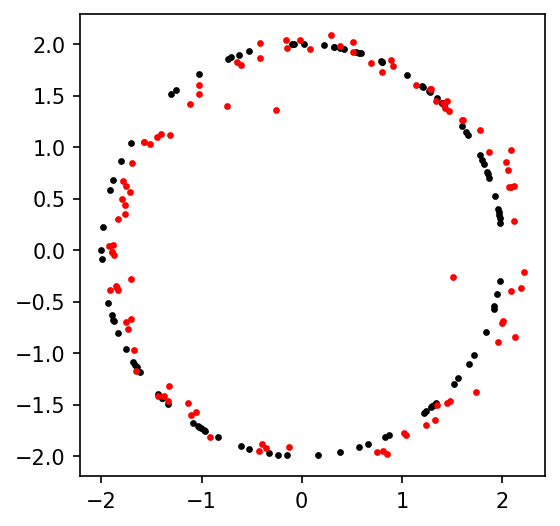

4/4 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.4300
Epoch number:  10000
Discriminator Accuracy on REAL points:  0.6100000143051147
Discriminator Accuracy on FAKE (generated) points:  0.4300000071525574


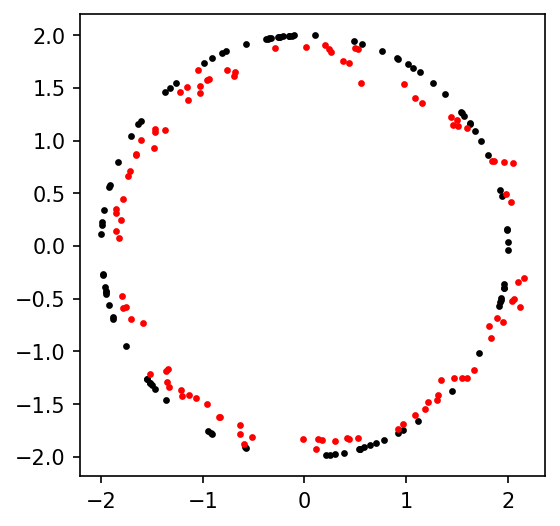

In [14]:
# Train GAN model
train(gen_model, dis_model, gan_model, latent_dim)

### We can track how the generator gets better over time. But if the discriminator still does a good job at telling real from fake most of the time. It can spot many of the generated examples as fake. We can keep training the model for another 10,000 rounds to make it even better.

### Another way to compare the performance is summarizing the stats. Let's do that:

In [15]:
# Generate 1000 fake samples
x_fake, y_fake = fake_samples(gen_model, latent_dim, 1000)
df_fake = pd.DataFrame(x_fake, columns=['x dimension', 'y dimension'])

# Sample 1000 real points
x_real, y_real = real_samples(1000)
df_real = pd.DataFrame(x_real, columns=['x dimension', 'y dimension'])

# Show summary statistics
print("Distribution statistics of fake (generated) points")
print(df_fake.describe())
print("----------------------------------------")
print("Distribution statisticss of real points")
print(df_real.describe())

32/32 [==============================] - 0s 2ms/step
Distribution statistics of fake (generated) points
       x dimension  y dimension
count  1000.000000  1000.000000
mean      0.166032     0.043424
std       1.390504     1.290147
min      -1.939795    -1.982725
25%      -1.220748    -1.252394
50%       0.286928     0.084655
75%       1.491756     1.286898
max       2.171153     2.074472
----------------------------------------
Distribution statisticss of real points
       x dimension  y dimension
count  1000.000000  1000.000000
mean     -0.078189     0.042090
std       1.435056     1.391663
min      -2.000000    -2.000000
25%      -1.550986    -1.306043
50%      -0.100489     0.094212
75%       1.396331     1.389563
max       2.000000     2.000000


### As you can see the difference in distributions is very small

# Bonus: If you wonder how the latent space looks like? Here you go:

In [16]:
latent_test = np.random.randn(latent_dim * 20000)
# Reshape into a batch of inputs for the network
latent_test = latent_test.reshape(20000, latent_dim)

# Create a 3D scatter plot
fig = px.scatter_3d(x=latent_test[:,0], y=latent_test[:,1], z=latent_test[:,2],
                 opacity=0.8, color_discrete_sequence=['black'], height=900, width=1000)

# Set figure title and colors
fig.update_layout(#title_text="3D Plot",
                  paper_bgcolor = 'white',
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=0.75, y=-1.75, z=1)),
                                    margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(title='x1',
                                          backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0'),
                               yaxis=dict(title='x2',
                                          backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0'
                                          ),
                               zaxis=dict(title='x3',
                                          backgroundcolor='lightgrey',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          )))

# Update marker size
fig.update_traces(marker=dict(size=1))

### Pick a few vectors from the latent space and predict using out generator model

In [17]:
print("Result for [0,0,0] vector]: ", gen_model.predict([[0,0,0]]))
print("Result for [1,0,0] vector]: ", gen_model.predict([[1,0,0]]))
print("Result for [1,1,0] vector]: ", gen_model.predict([[1,1,0]]))
print("Result for [1,1,1] vector]: ", gen_model.predict([[1,1,1]]))

1/1 [==============================] - 0s 94ms/step
Result for [0,0,0] vector]:  [[-1.4579537  1.2665751]]
1/1 [==============================] - 0s 44ms/step
Result for [1,0,0] vector]:  [[ 0.6307209 -1.8988814]]
1/1 [==============================] - 0s 48ms/step
Result for [1,1,0] vector]:  [[ 1.647394  -1.1449554]]
1/1 [==============================] - 0s 49ms/step
Result for [1,1,1] vector]:  [[ 1.8285203 -0.8835275]]


 <p align="center"><b><font size="2">-- End of program --</font></b></p>
 <p align="center"><b><font size="10"> Happy coding! 😀</font></b></p>


